In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Read Ratings file using Pandas

In [25]:
ratings_data=pd.read_csv("ratings.csv")
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Read movies file using Pandas

In [26]:
movie_names=pd.read_csv("movies.csv")
movie_names.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [27]:
movie_data=pd.merge(ratings_data,movie_names,on='movieId')
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


New Dataframe for Analysis

In [28]:
trend=pd.DataFrame(movie_data.groupby('title')['rating'].mean())
trend['total number of ratings'] = pd.DataFrame(movie_data.groupby('title')['rating'].count()) 
trend.head()

,rating,total number of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


A bar graph describing number of reviews for first 25 movies

C:\Users\sonar\AppData\Local\Temp\ipykernel_289016\2245226367.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(trend.index,rotation=40,fontsize='12',horizontalalignment="right")


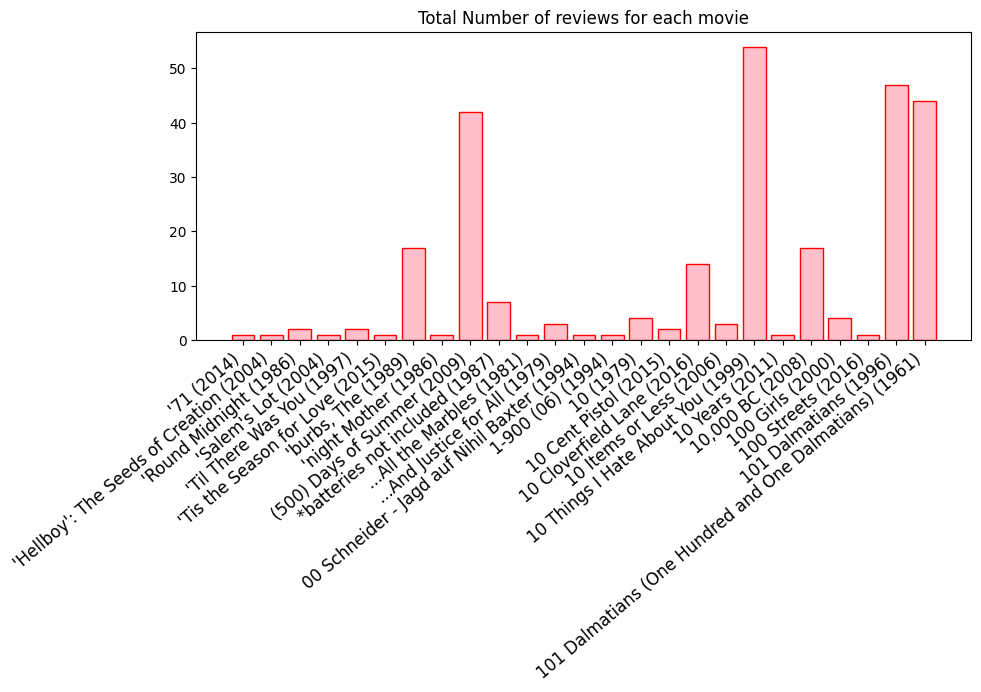

In [29]:
plt.figure(figsize =(10, 4))
ax=plt.subplot()
ax.bar(trend.head(25).index,trend['total number of ratings'].head(25),color='pink',edgecolor='red')
ax.set_xticklabels(trend.index,rotation=40,fontsize='12',horizontalalignment="right")
ax.set_title("Total Number of reviews for each movie")
plt.show()

Testing the recommendation system to provide movie names

In [30]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64